Exploratory Data Analysis (EDA)



Conduct EDA on data from students in portugal to examine relationship between different variables and academic outcomes after semesters 1, 2 and 3. Research consistently shows a strong link between family engaement and student academic success regardless of socio economic status or background. My aim in this project is to examine if this holds true with this data set. 


Hypothesis: Students who have better famliy support and relationships will on average earn better grades and have higher attendance rates. 

Dataset features:

school: Student's school (binary: GP (Gabriel Pereira) or MS (Mousinho da Silveira))

sex: Student's sex (binary: 'F' - female or 'M' - male)

age: Student age (numeric: 15 to 22)

address: Type of student's residential address (binary: 'U' - urban or 'R' - rural)

famsize: Family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3)

Pstatus: Parents' cohabitation status (binary: 'T' - living together or 'A' - separated)

Medu: Mother's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Fedu: Father's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Mjob: Mother's job (nominal: teacher, health, services, at_home or Other)

Fjob: Father's job (nominal: teacher, health, services, at_home or Other)

reason: Reason for choosing this school (nominal: home, reputation, course or other)

guardian: Student's guardian (nominal: mother, father or other)

traveltime: Travel time from home to school (time intervals: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour or 4 - >1 hour )

studytime: Weekly study time (time intervals: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours or 4 - >10 hours)

schoolsup: Extra educational support (binary: yes or no)

famsup: Family educational support (binary: yes or no)

paid: Private classes on subjects related to the course (binary: yes or no)

activities: Performs extracurricular activities (binary: yes or no)

nursery: Attended daycare (binary: yes or no)

higher: Desire to pursue a degree (binary: yes or no)

internet: Internet access at home (binary: yes or no)

romantic: Are you in a romantic relationship (binary: yes or no)

famrel: Quality of family relationships (categorical: from 1 - very bad to 5 - excellent)

freetime: Free time after school (categorical: from 1 - very low to 5 - very high)

goout: Time with friends (categorical: from 1 - very low to 5 - very high)

Dalc: Alcohol consumption on the work day (categorical: from 1 - very low to 5 - very high)

Walc: Alcohol consumption on the weekend (categorical: from 1 - very low to 5 - very high)

health: Current health status (categorical: from 1 - very bad to 5 - very good)

absences: Number of school absences (numeric: from 0 to 93)

G1: First semester grade (numeric: from 0 to 20)

G2: Second semester grade (numeric: from 0 to 20)

G3: Third semester grade 

In [1]:
import io

In [2]:
%pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install ydata-profiling



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pathlib import Path
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_zipped_file

In [6]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from collections import Counter

In [8]:
%pip install ydata


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load the data

## Note: The data is NOT seperated by ',' but by ';' so I had to add the delimiter=';' argument

In [9]:
df = pd.read_csv('student-mat.csv',delimiter=';')

In [10]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##Checking for missing values, duplicates and outliers

In [12]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [14]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [17]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [18]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [19]:
#Checking how many students are 22 years of age
df['age'].value_counts().max()

104

In [20]:
#Checking how many students are the min age 15
df['age'].value_counts().min()

1

In [21]:
age_counts = Counter(df['age'])
unique_ages = list(age_counts.keys())
counts = list(age_counts.values())

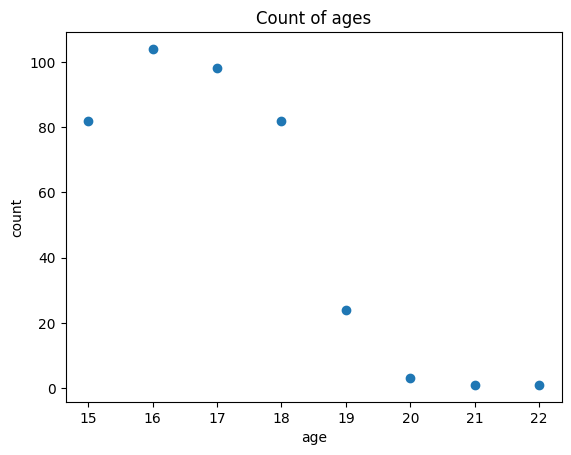

In [22]:
counts = list(age_counts.values())

plt.scatter(unique_ages, counts)

plt.xlabel('age')

plt.ylabel('count')

plt.title('Count of ages')

plt.show()

Notes: Most of the data is for students ages 15-19 with only 4 students being 20 and over. These could be considered outliers and I should drop them. 

In [23]:
mask = df['age'] < 20 

student_df = df[mask]

In [24]:
student_df = df[mask]

In [25]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [26]:
#Check to make sure data is for students under 20 years of age. 
student_df['age'].max()

19

In [27]:
student_df = student_df.drop('school', axis=1)

Data Clean and Data Manipulation

#Change columns G1,G2,G3 these represent grades for three trimesters, I need to change these since they are on a scale of 0-20. I want them to reflect grades in USA 0-100. 

In [28]:
#Change grade scale from 0-20 to 0-100 by multiplying each element in G1,G2,G3 by 5 since 20 is 1/5 of 100.
cols_to_multiply = ['G1','G2','G3']
student_df[cols_to_multiply] = student_df[cols_to_multiply] * 5

In [29]:
#Check to see if columns are now on scale of 0-100
student_df[cols_to_multiply].head(20)

,G1,G2,G3
0,25,30,30
1,25,25,30
2,35,40,50
3,75,70,75
4,30,50,50
5,75,75,75
6,60,60,55
7,30,25,30
8,80,90,95
9,70,75,75


## Create an absence % feature using the 'absences' column. I did an internet search which showed that in portugal students attend for 180 days. 

In [30]:
#Most number of school days missed. 
student_df['absences'].max()

75

In [31]:
student_df['absences'].value_counts()

absences
0     114
2      65
4      52
6      31
8      22
10     17
14     12
12     12
7       7
3       7
16      6
5       5
18      5
20      4
9       3
13      3
15      3
22      3
1       3
11      2
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64

In [32]:
student_df['absences'].describe()

count    390.000000
mean       5.694872
std        8.026097
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [33]:
#Least number of school days missed. 
student_df['absences'].min()

0

In [34]:
#Creating feature/column 'abscense %' by dividing the elements in 'absence' by 180 which is the total number of school days. 

student_df['absences %'] = student_df['absences']/180

In [35]:
#Have to multiply by 100 to get percentage 
student_df['absences %'] = student_df['absences %'] *100

In [36]:
student_df['absences %'].head()

0    3.333333
1    2.222222
2    5.555556
3    1.111111
4    2.222222
Name: absences %, dtype: float64

EDA with Ydata

In [37]:
#profile = ProfileReport(student_df, title="Profiling Report")

In [38]:
#profile.to_widgets()

In [39]:
#profile.to_notebook_iframe()

In [40]:
student_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'absences %'],
      dtype='object')

In [41]:
student_df['G1'].mean()

54.51282051282051

In [42]:
student_df['G1'].median()

55.0

In [43]:
student_df['G2'].mean()

53.52564102564103

In [44]:
student_df['G2'].median()

55.0

In [45]:
student_df['G3'].mean()

52.01282051282051

In [46]:
student_df['G3'].median()

55.0

## Plot values for class failures 

Text(0.5, 0, 'semester 1 grades')

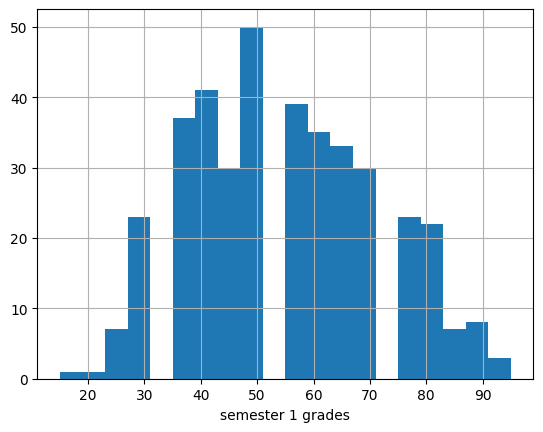

In [47]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G1'].hist(bins=20)

ax.set_xlabel('semester 1 grades')


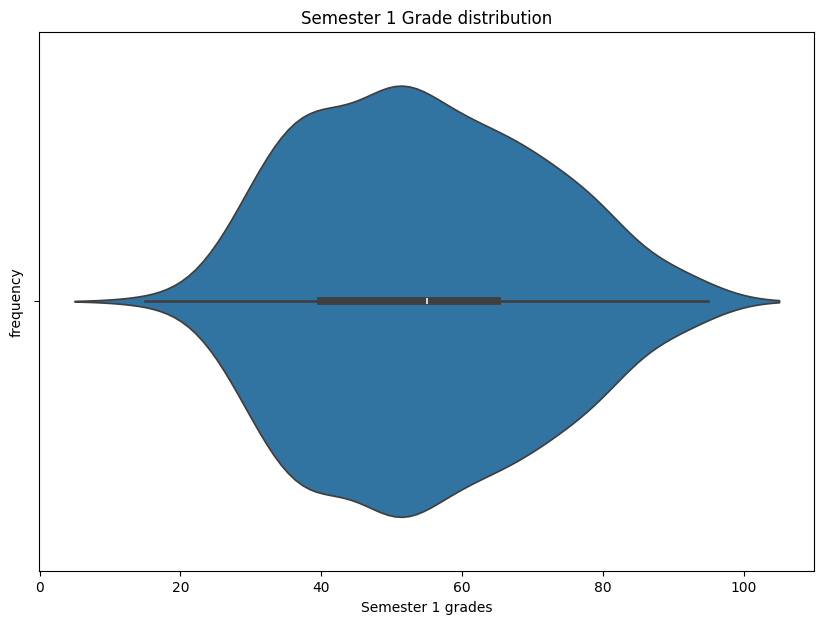

In [48]:
fig, ax = plt.subplots(figsize=(10,7))

sns.violinplot(x='G1', data=student_df, ax=ax)

#Lable axis

ax.set_xlabel('Semester 1 grades')
ax.set_ylabel('frequency')
ax.set_title('Semester 1 Grade distribution')

plt.show()

## Famliy relationship rating plot vs grades for semester 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


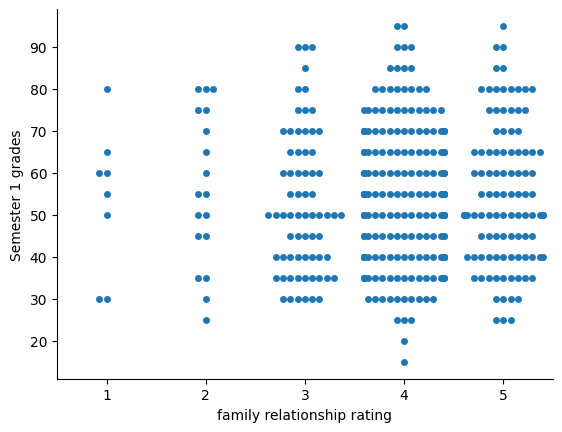

In [49]:
sns.swarmplot(data=student_df,
            x='famrel',
            y='G1')
plt.xlabel('family relationship rating')
plt.ylabel('Semester 1 grades')
sns.despine()

plt.show()

## Plot for family educational support and semester 1 grades.

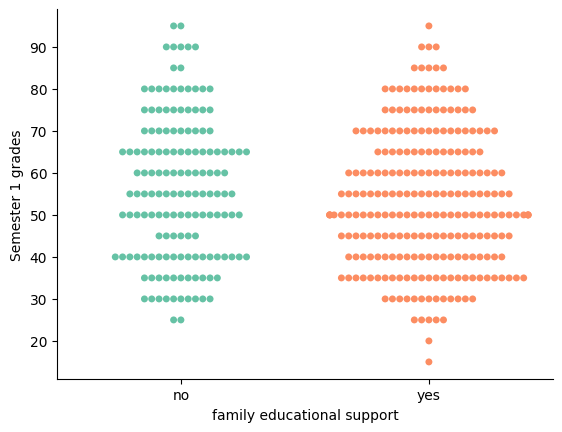

In [50]:
sns.swarmplot(data=student_df,
            x='famsup',
            y='G1',hue='famsup', palette='Set2')
plt.xlabel('family educational support')
plt.ylabel('Semester 1 grades')
sns.despine()

plt.show()

## Plot for Semester 1 grades and number of hours studied with and without family support.

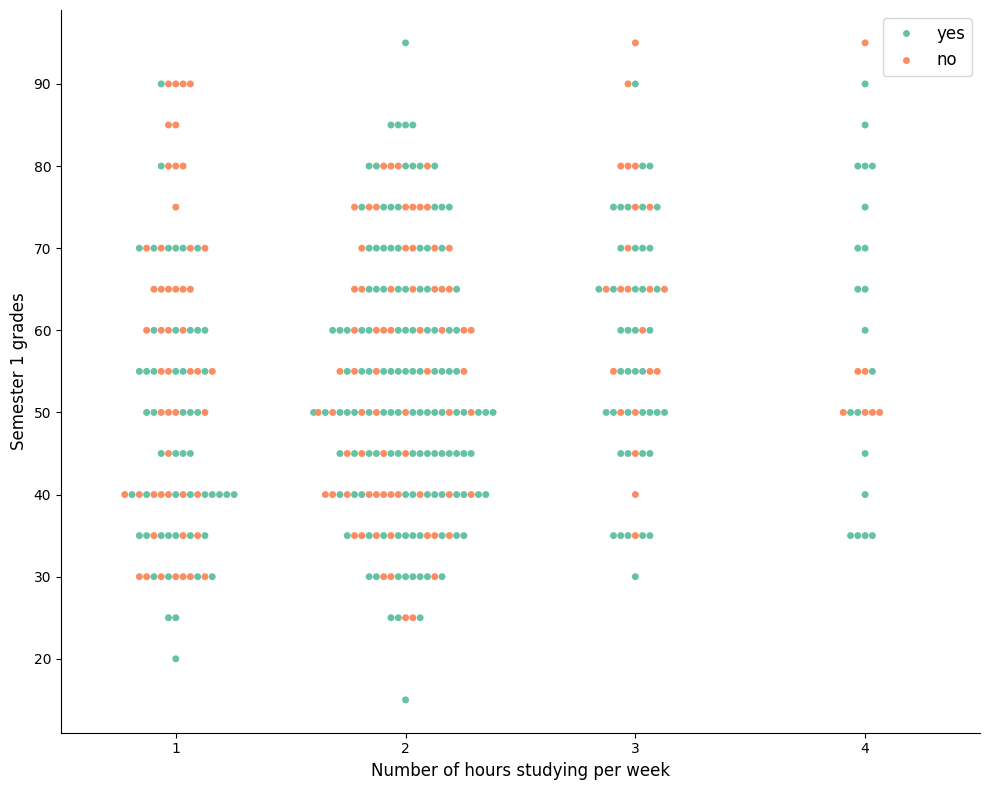

In [51]:

plt.figure(figsize=(10,8))

sns.swarmplot(data=student_df,
            x='studytime',
            y='G1',hue='famsup', palette='Set2', size=5)
plt.xlabel('Number of hours studying per week', fontsize= 12)
plt.ylabel('Semester 1 grades', fontsize=12)
sns.despine()

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

This swarmplot shows that students who recieve family educational support tend to study more hours per week as seen by the green dots. 

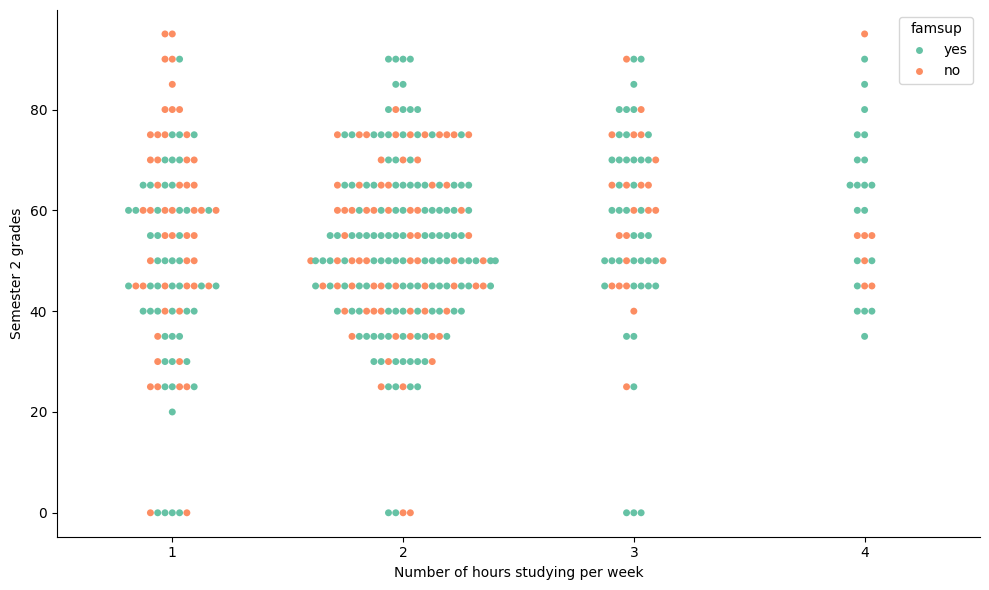

In [52]:

plt.figure(figsize=(10,6))
sns.swarmplot(data=student_df,
            x='studytime',
            y='G2',hue='famsup', palette='Set2')
plt.xlabel('Number of hours studying per week')
plt.ylabel('Semester 2 grades')
sns.despine()

plt.tight_layout()
plt.show()

## Comparing how many students failed classes with and without family support

In [53]:
student_famsup_nofailures = student_df[(student_df['famsup'] =='yes') & (student_df['failures']<1)]

print(len(student_famsup_nofailures))

197


In [54]:
student_famsup_nofailures.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences %
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,25,25,30,2.222222
3,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,75,70,75,1.111111
4,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,30,50,50,2.222222
5,M,16,U,LE3,T,4,3,services,other,reputation,...,4,2,1,2,5,10,75,75,75,5.555556
7,F,17,U,GT3,A,4,4,other,teacher,home,...,1,4,1,1,1,6,30,25,30,3.333333


In [55]:
student_famsup_failures = student_df[(student_df['famsup'] =='yes') & (student_df['failures']>=1)]

print(len(student_famsup_failures))

43


In [56]:
fail_rate_with_famsup_yes = len(student_famsup_nofailures)/(len(student_famsup_nofailures) + len(student_famsup_failures)) *100

print(fail_rate_with_famsup_yes)

82.08333333333333


## Observations: Roughly 82% of students who had family support did not fail a single class semester 1.

## Students with no family support

In [57]:
student_nofamsup_nofailures = student_df[(student_df['famsup'] =='no') & (student_df['failures']<1)]

print(len(student_nofamsup_nofailures))

114


In [58]:
student_nofamsup_failures = student_df[(student_df['famsup'] =='no') & (student_df['failures']>=1)]

print(len(student_nofamsup_failures))

36


In [59]:
fail_rate_with_famsup_no = len(student_nofamsup_nofailures)/(len(student_nofamsup_failures) + len(student_nofamsup_nofailures)) *100

print(fail_rate_with_famsup_no)

76.0


## Observations: 76% of students with no famliy support did not fail a single class semester 1

In [60]:
print(len(student_df[student_df['failures']>=1]))

79


In [61]:
print(len(student_df['failures']))

390


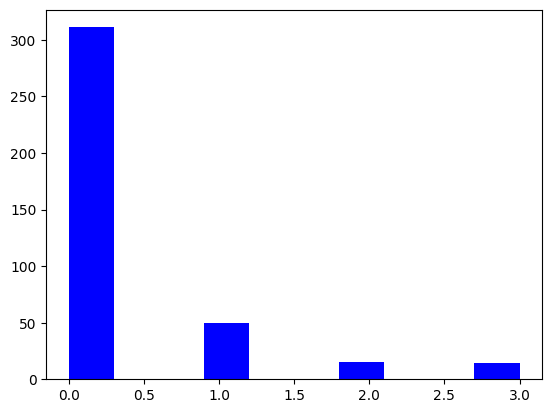

In [62]:
plt.hist(student_df['failures'], bins=10, color='blue')



plt.show()

## Family support and average failure rate

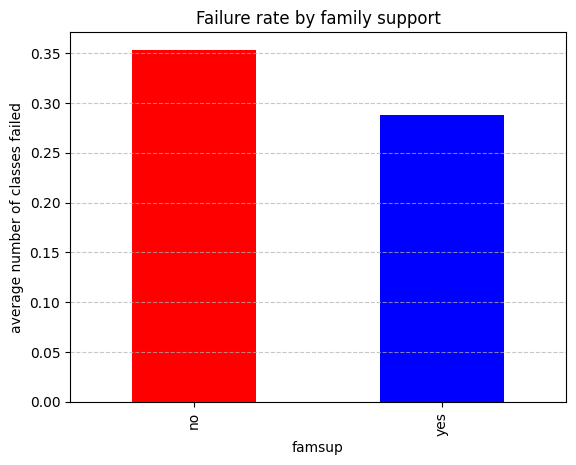

In [63]:
grouped_data = student_df.groupby('famsup')['failures'].mean()

grouped_data.plot(kind='bar', color=['red','blue'])


plt.title('Failure rate by family support')

plt.ylabel('average number of classes failed')

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

## T-test and P-value comparing students grades with and without family support

In [64]:
df2 = student_df

df2['famsup_binary'] = student_df['famsup'].map({'yes':1, 'no': 0})

#grade_average = df2['G1']['G2']['G3'].mean()

In [65]:
import scipy.stats as stats 

In [66]:
#grade_average = df2['G1']['G2']['G3'].mean()

avg_G1 = student_df['G1'].mean()

avg_G2 = student_df['G2'].mean()

avg_G3 = student_df['G3'].mean()

In [67]:
#

average_grades = (avg_G1 + avg_G2 + avg_G3)/ 3

print(average_grades)

53.350427350427346


In [68]:
len(df2['G1'])

390

In [69]:

grades_with_famsup = df2[df2['famsup_binary']==1]['G1']

grades_without_famsup = df2[df2['famsup_binary']==0]['G1']


#T-test

t_stat, p_value = stats.ttest_ind(grades_with_famsup, grades_without_famsup)#, equal_var=False)

In [70]:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.7224555465662228, P-value: 0.08578389215008299


## Thoughts:

T statistic shows a difference of -1.7 in means of the two groups.

P-value of .089 is greater than .05 I would fail to reject the null hypothesis. 

## Family support and Study time average

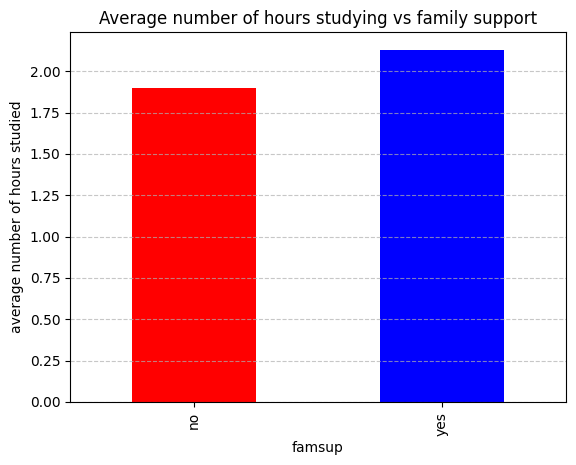

In [71]:
grouped_data = student_df.groupby('famsup')['studytime'].mean()

grouped_data.plot(kind='bar', color=['red','blue'])


plt.title('Average number of hours studying vs family support')

plt.ylabel('average number of hours studied')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Study Time and Family support comparison using T-test and P-value. 

## Bug! Study time has 4 categories

In [72]:
#Study time with fam support


study_famsup = df2[df2['famsup_binary']==1]['studytime']

study_no_famsup = df2[df2['famsup_binary']==0]['studytime']


t_stat, pvalue = stats.ttest_ind(study_famsup, study_no_famsup, equal_var=False) #This assumes that variance between both categories is unequal. 

In [73]:
print(f"T-statistic: {t_stat}, P-value: {pvalue}")

T-statistic: 2.664344517944362, P-value: 0.00810073961136614


In [74]:
student_df['famsup'].value_counts()

famsup
yes    240
no     150
Name: count, dtype: int64

## Reflection on T-statistic and P-value of study time and family support:

The T-statistic value suggest that students with family support tend to spend more time studying if they have family support. 
A P-value of 0.0089 is statistically significant and is strong evidence that family support leads to increased study time. 

## Studytime and failure rates

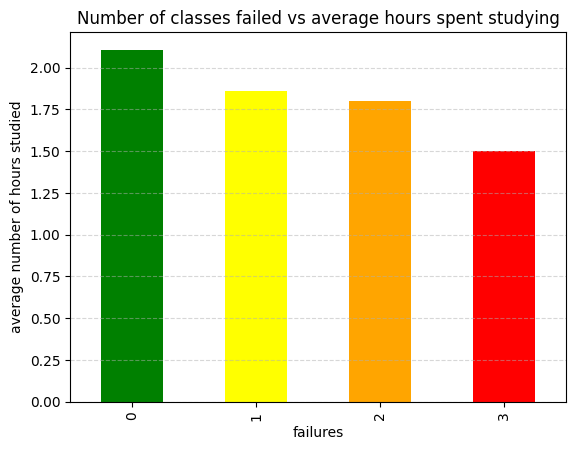

In [75]:
grouped_data = student_df.groupby('failures')['studytime'].mean()

grouped_data.plot(kind='bar', color=['green','yellow','orange','red'])


plt.title('Number of classes failed vs average hours spent studying')

plt.ylabel('average number of hours studied')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [76]:
student_df['failures'].value_counts()

failures
0    311
1     50
2     15
3     14
Name: count, dtype: int64

Visualizing how average hours of study per week affects failure of classes. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


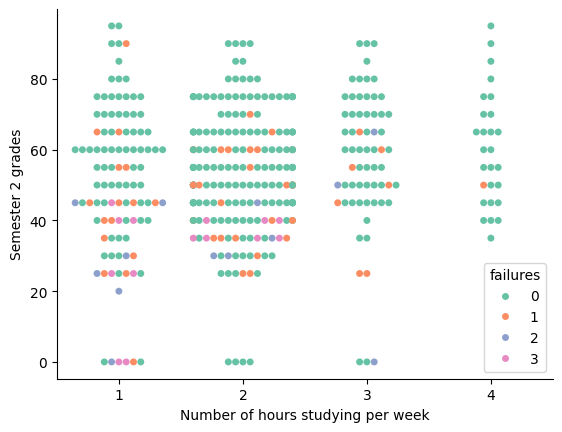

In [77]:
sns.swarmplot(data=student_df,
            x='studytime',
            y='G2',hue='failures', palette='Set2')
plt.xlabel('Number of hours studying per week')
plt.ylabel('Semester 2 grades')
sns.despine()

plt.show()

Text(0.5, 0, 'semester 2 grades')

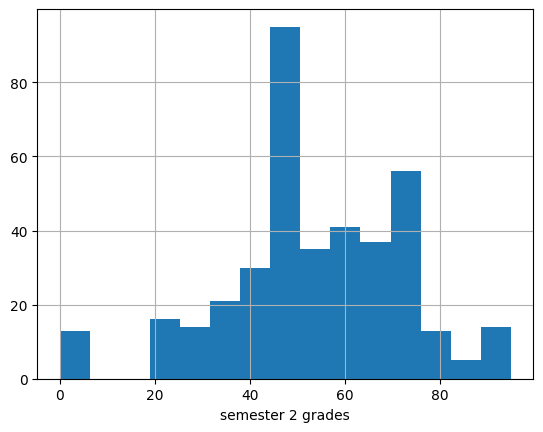

In [78]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G2'].hist(bins=15)

ax.set_xlabel('semester 2 grades')

Text(0.5, 0, 'semester 3 grades')

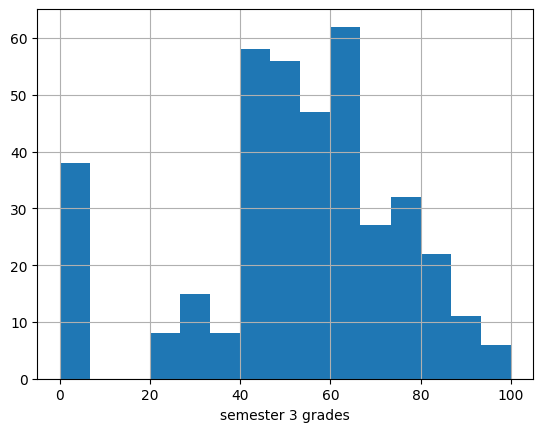

In [79]:
#Plot values for failures
#Use for any/all columns

ax = student_df['G3'].hist(bins=15)

ax.set_xlabel('semester 3 grades')

In [80]:
#Study time with fam support

#Need ANOVA since study time is categorical with more than two features

# Perform ANOVA
studytime_categories = df2['studytime'].unique()

# Create a list of G1 values for each studytime category
G1_groups = [df2[df2['studytime'] == category]['G1'] for category in studytime_categories]

# Perform one-way ANOVA
anova_result = stats.f_oneway(*G1_groups)

print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

F-statistic: 4.3269896841372395, P-value: 0.005127912927727126


In [81]:
pip install pingouin


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
import pingouin as pg

# Perform one-way ANOVA with pingouin
anova_result = pg.anova(dv='G1', between='studytime', data=df, detailed=True)

print(anova_result)


      Source           SS   DF         MS         F     p-unc       np2
0  studytime   146.388618    3  48.796206  4.548835  0.003792  0.033725
1     Within  4194.330370  391  10.727188       NaN       NaN       NaN


Text(0.5, 0, 'family relationship')

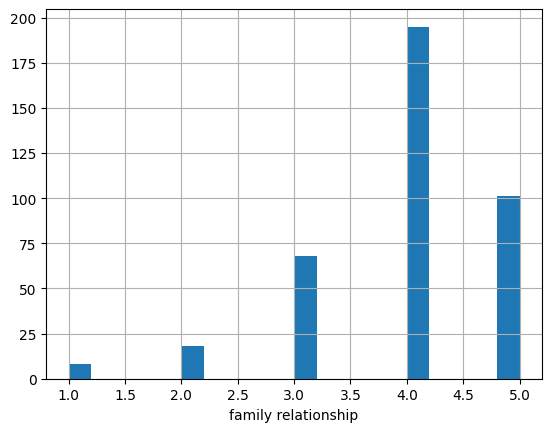

In [83]:
ax = student_df['famrel'].hist(bins=20)

ax.set_xlabel('family relationship')

In [84]:
student_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'absences %', 'famsup_binary'],
      dtype='object')

Text(0.5, 0, 'family support')

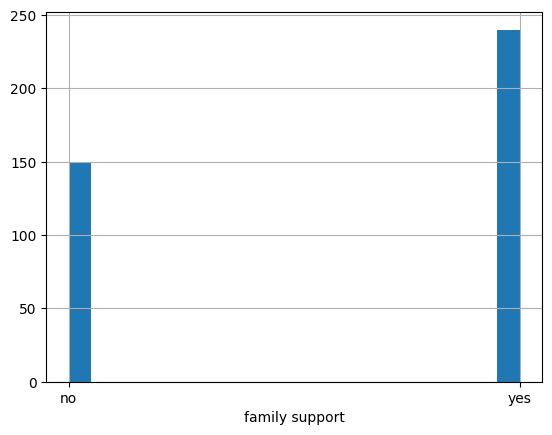

In [85]:
ax = student_df['famsup'].hist(bins=20)

ax.set_xlabel('family support')

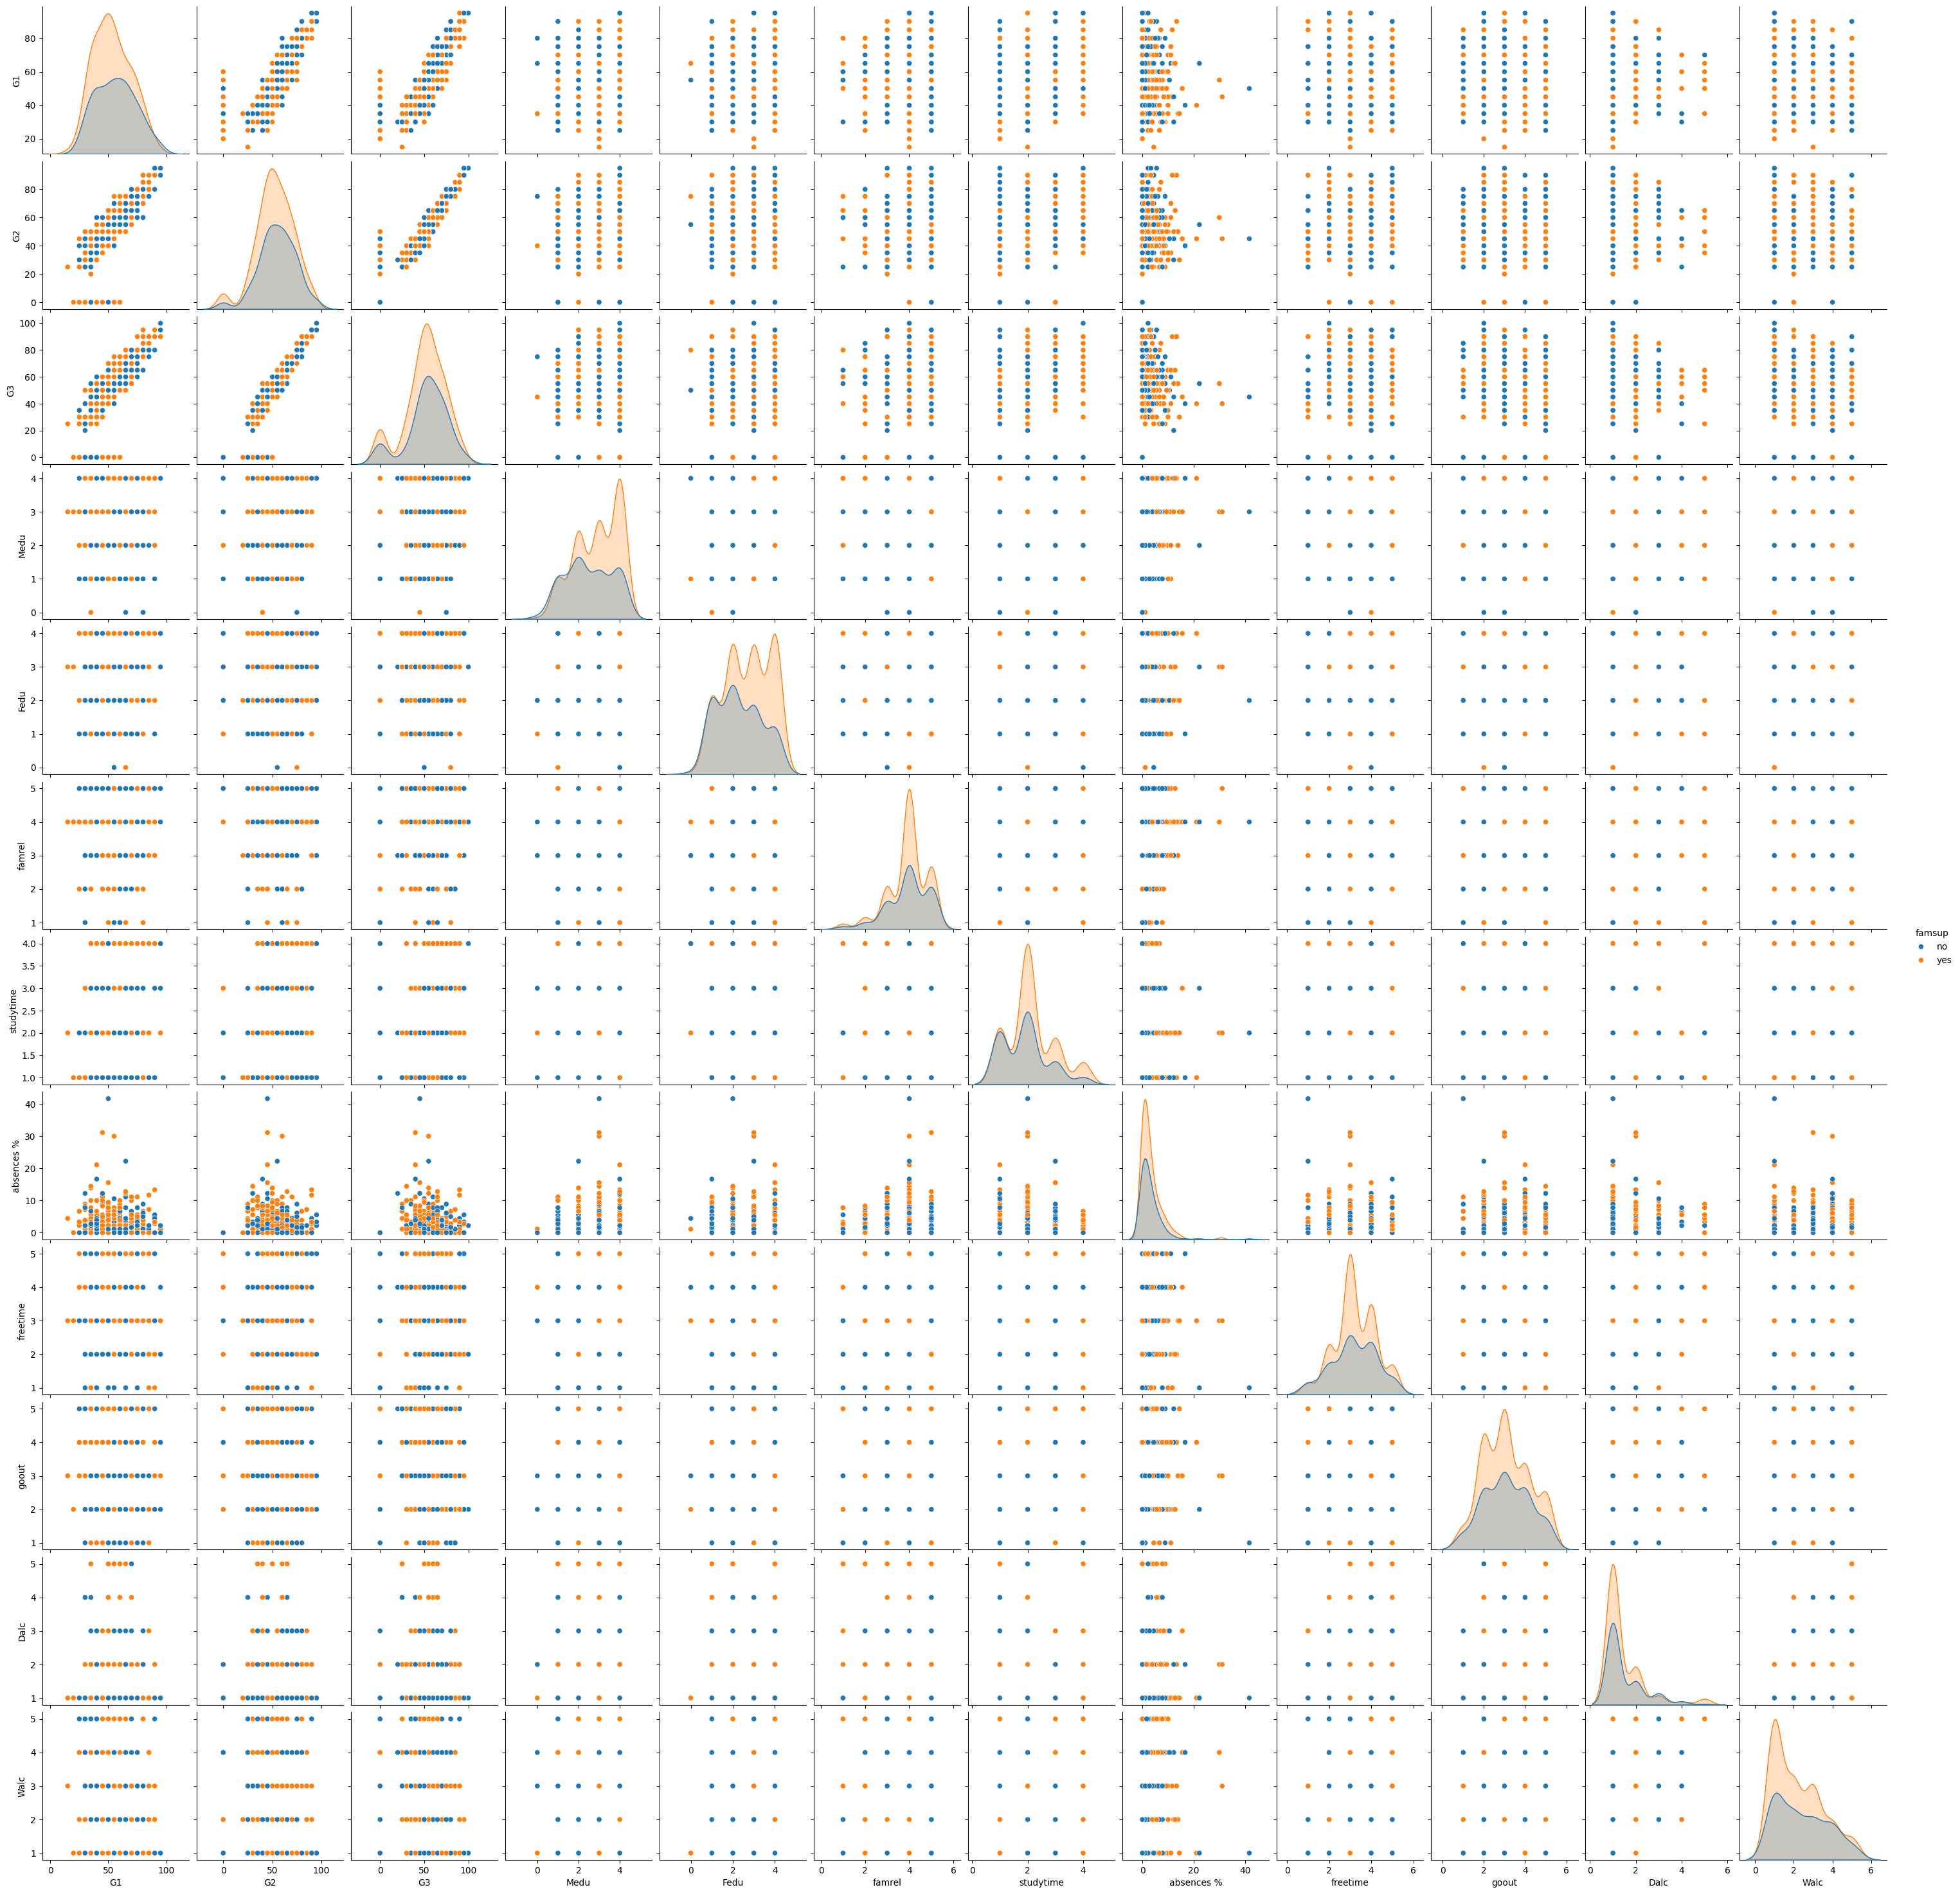

In [86]:
# Pair plot for grades and family-related features
sns.pairplot(student_df[['G1', 'G2', 'G3', 'famsize', 'Medu', 'Fedu','famsup','famrel','studytime','absences %','sex','romantic','freetime','goout','Dalc','Walc']], hue='famsup')
plt.show()

In [87]:
Mean_grade = student_df[['G1','G2','G3']].mean()

print(Mean_grade)

G1    54.512821
G2    53.525641
G3    52.012821
dtype: float64


In [88]:
student_df['famrel'].value_counts()

famrel
4    195
5    101
3     68
2     18
1      8
Name: count, dtype: int64

In [89]:
# Example: Summary statistics of grades based on family relationship
summary_rel = student_df.groupby('famrel')[['G1', 'G2', 'G3']].mean()
print(summary_rel)

               G1         G2         G3
famrel                                 
1       53.750000  57.500000  53.125000
2       56.111111  56.111111  49.444444
3       52.794118  52.794118  50.220588
4       54.794872  53.384615  51.794872
5       54.900990  53.514851  54.009901


In [90]:
# Example: Summary statistics of grades based on family relationship
summary_famsup = student_df.groupby('famsup')[['G1', 'G2', 'G3']].mean()
print(summary_famsup)

               G1         G2         G3
famsup                                 
no      56.333333  54.933333  53.166667
yes     53.375000  52.645833  51.291667


In [91]:
student_df['studytime'].value_counts()

studytime
2    197
1    102
3     64
4     27
Name: count, dtype: int64

## Study Times and Average Grades over all 3 grading periods 

In [92]:
student_study = student_df.groupby('studytime')[['G1', 'G2', 'G3']].mean()

print(student_study)

                  G1         G2         G3
studytime                                 
1          52.107843  51.225490  50.098039
2          53.299492  52.563452  50.888325
3          60.000000  57.343750  56.718750
4          59.444444  60.185185  56.296296


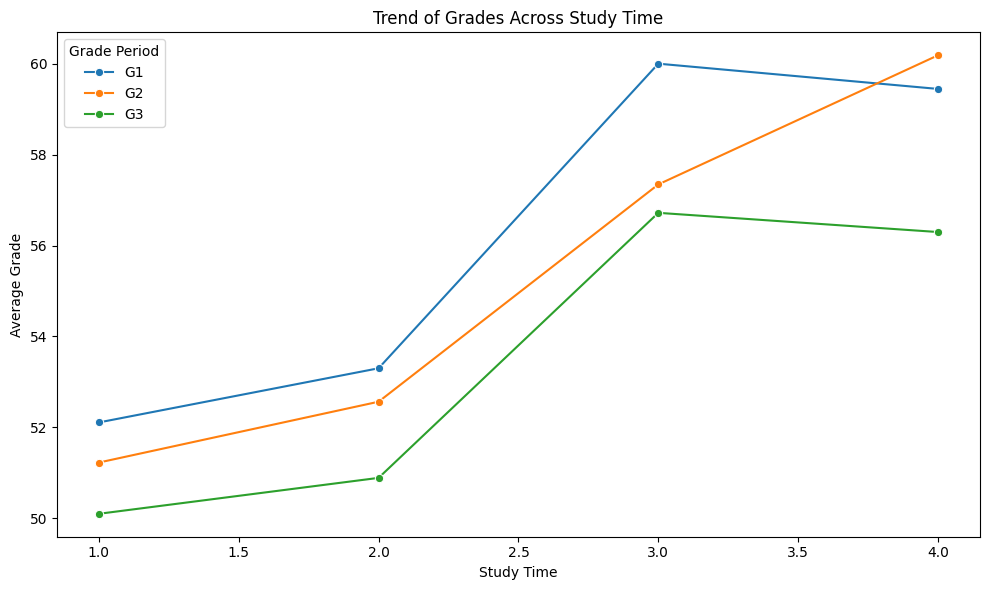

In [93]:

# Reset index to make 'studytime' a column
student_study_reset = student_study.reset_index()


plt.figure(figsize=(10, 6))

# line plot
sns.lineplot(data=student_study_reset.melt(id_vars='studytime', var_name='grade_period', value_name='grade'), 
             x='studytime', y='grade', hue='grade_period', marker='o')


plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.title('Trend of Grades Across Study Time')
plt.legend(title='Grade Period')


plt.tight_layout()
plt.show()

## Creating dummy variables for categorical features

## Struggled to get create a correlation matrix since many of the variables were categorical. Had to do some searching on the internet to discover how to create a correlation matrix with categorical variables.

In [94]:

#This failed because not all values were numeric
student_df.corr()

ValueError: could not convert string to float: 'F'

In [95]:
student_df.dtypes

sex               object
age                int64
address           object
famsize           object
Pstatus           object
Medu               int64
Fedu               int64
Mjob              object
Fjob              object
reason            object
guardian          object
traveltime         int64
studytime          int64
failures           int64
schoolsup         object
famsup            object
paid              object
activities        object
nursery           object
higher            object
internet          object
romantic          object
famrel             int64
freetime           int64
goout              int64
Dalc               int64
Walc               int64
health             int64
absences           int64
G1                 int64
G2                 int64
G3                 int64
absences %       float64
famsup_binary      int64
dtype: object

In [96]:
categorical_cols = student_df.select_dtypes(include=['object','category']).columns

In [97]:
#Print categorical columns 
print(categorical_cols)

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'],
      dtype='object')


In [98]:
pd.set_option('display.max_columns', 40)



In [99]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            390 non-null    object 
 1   age            390 non-null    int64  
 2   address        390 non-null    object 
 3   famsize        390 non-null    object 
 4   Pstatus        390 non-null    object 
 5   Medu           390 non-null    int64  
 6   Fedu           390 non-null    int64  
 7   Mjob           390 non-null    object 
 8   Fjob           390 non-null    object 
 9   reason         390 non-null    object 
 10  guardian       390 non-null    object 
 11  traveltime     390 non-null    int64  
 12  studytime      390 non-null    int64  
 13  failures       390 non-null    int64  
 14  schoolsup      390 non-null    object 
 15  famsup         390 non-null    object 
 16  paid           390 non-null    object 
 17  activities     390 non-null    object 
 18  nursery        

## Note: Fedu and Medu are on a scale of 0-4 where every other ordinal feature is on a scale of 1-5



Medu: Mother's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

Fedu: Father's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)

In [109]:
#Note: Fedu and Medu are on a scale of 0-4 where every other ordinal feature is on a scale of 1-5
student_df['Medu'].value_counts()

Medu
4    130
2    102
3     97
1     58
0      3
Name: count, dtype: int64

## Cols to convert to categories:


## Note: One-hot encoding is not the best approach for these columns as they are Ordinal and preserving their order is essential.

Medu: Mothers level of education (Ordinal)
Fedu: Fathers level of education (Ordinal) 

famrel: Quality of family relationships (categorical: from 1 - very bad to 5 - excellent) Ordinal

freetime: Free time after school (categorical: from 1 - very low to 5 - very high) Ordinal

goout: Time with friends (categorical: from 1 - very low to 5 - very high) Ordinal

Dalc: Alcohol consumption on the work day (categorical: from 1 - very low to 5 - very high) Ordinal

Walc: Alcohol consumption on the weekend (categorical: from 1 - very low to 5 - very high) Ordinal

health: Current health status (categorical: from 1 - very bad to 5 - very good) Ordinal 

In [102]:
from sklearn.preprocessing import OrdinalEncoder

ordinal1_columns = ['famrel','freetime','goout','Dalc','Walc','health']


ordinal2_columns = ['Medu', 'Fedu']

df_encoded = student_df.copy()
#OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#Ordinal columns except Fedu and Medu
df_encoded[ordinal1_columns] = ordinal_encoder.fit_transform(df_encoded[ordinal1_columns])


#Fedu and Medu 
df_encoded[ordinal2_columns] = ordinal_encoder.fit_transform(df_encoded[ordinal2_columns])

In [ ]:
# Keep original numeric values but mark them as ordinal 

#This is also something I could implement

#for column in ordinal_columns:
#    student_df[column] = pd.Categorical(student_df[column], ordered=True)

## Other option is to encode mannually, this is not necessary but I am saving this here as it might be needed later on.

In [111]:
#Map Ordinal columns, Medu and Fedu must be mapped seperately since they are on a scale of 0-4. 
#map_Fedu_Medu = {'None':0,'Elementary_low':1,'Elementary': 2,'Highschool': 3, 'Higher_Education':4}

#map_ordinal = {'very_low':1, 'low':2, 'medium':3,'high':4, 'very_high':5}

## Preprocessing binary features mannually instead of using getdummies(). 

## Using getdummies on these feature would lead to redundancy since each feature would have two features created to represent 'yes' and 'no' seperately

## Binary features: 


## 'yes' and 'no'
schoolsup      
famsup          
paid            
activities      
nursery        
higher          
internet        
romantic 

In [112]:
#Binary features mapping

binary_columns = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']


df_encoded[binary_columns] = df_encoded[binary_columns].apply(lambda x : x.map({'yes':1, 'no':0}))

In [113]:
df_encoded[binary_columns].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [114]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            390 non-null    object 
 1   age            390 non-null    int64  
 2   address        390 non-null    object 
 3   famsize        390 non-null    object 
 4   Pstatus        390 non-null    object 
 5   Medu           390 non-null    float64
 6   Fedu           390 non-null    float64
 7   Mjob           390 non-null    object 
 8   Fjob           390 non-null    object 
 9   reason         390 non-null    object 
 10  guardian       390 non-null    object 
 11  traveltime     390 non-null    int64  
 12  studytime      390 non-null    int64  
 13  failures       390 non-null    int64  
 14  schoolsup      390 non-null    int64  
 15  famsup         390 non-null    int64  
 16  paid           390 non-null    int64  
 17  activities     390 non-null    int64  
 18  nursery        

## Binary encoding for other 
sex
address
famsize
Pstatus

['sex','address','famsize','Pstatus']

In [119]:
df_encoded.select_dtypes(include=['object','category']).columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian'],
      dtype='object')

In [117]:
object_cols = df_encoded.select_dtypes(include=['object','category']).columns

In [118]:
df_encoded[object_cols].head()

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
0,F,U,GT3,A,at_home,teacher,course,mother
1,F,U,GT3,T,at_home,other,course,father
2,F,U,LE3,T,at_home,other,other,mother
3,F,U,GT3,T,health,services,home,mother
4,F,U,GT3,T,other,other,home,father


In [120]:
# Mapping binary columns to 0 and 1
df_encoded['sex'] = df_encoded['sex'].map({'F': 0, 'M': 1})
df_encoded['address'] = df_encoded['address'].map({'R': 0, 'U': 1})
df_encoded['famsize'] = df_encoded['famsize'].map({'LE3': 0, 'GT3': 1})
df_encoded['Pstatus'] = df_encoded['Pstatus'].map({'A': 0, 'T': 1})


## One-hot encoding on remaining nominal features

In [121]:
# One-hot encoding nominal columns
one_hot_columns = ['Mjob', 'Fjob', 'reason', 'guardian']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns, drop_first=True)

In [122]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                390 non-null    int64  
 1   age                390 non-null    int64  
 2   address            390 non-null    int64  
 3   famsize            390 non-null    int64  
 4   Pstatus            390 non-null    int64  
 5   Medu               390 non-null    float64
 6   Fedu               390 non-null    float64
 7   traveltime         390 non-null    int64  
 8   studytime          390 non-null    int64  
 9   failures           390 non-null    int64  
 10  schoolsup          390 non-null    int64  
 11  famsup             390 non-null    int64  
 12  paid               390 non-null    int64  
 13  activities         390 non-null    int64  
 14  nursery            390 non-null    int64  
 15  higher             390 non-null    int64  
 16  internet           390 non-null

## df_encoded is now clean and ready normalization:

## Note: I don't need to normalize my binary features. However I have a few features with different ranges such as 'age', 'G1', 'G2', 'G3'(Grades for semester 1-3)


## Note: I should not normalise my Ordinal features!

In [123]:
from sklearn.preprocessing import StandardScaler

continuous_numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'absences %', 'G1', 'G2', 'G3']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[continuous_numeric_columns] = scaler.fit_transform(df_encoded[continuous_numeric_columns])


##

In [124]:


#Calculate the Correlation Matrix
correlation_matrix = df_encoded.corr()

In [125]:
print(correlation_matrix)

                        sex       age       address   famsize   Pstatus  \
sex                1.000000 -0.061020 -2.686681e-02 -0.090346  0.039391   
age               -0.061020  1.000000 -1.580659e-01 -0.051760  0.065552   
address           -0.026867 -0.158066  1.000000e+00 -0.070705 -0.034902   
famsize           -0.090346 -0.051760 -7.070496e-02  1.000000  0.145074   
Pstatus            0.039391  0.065552 -3.490171e-02  0.145074  1.000000   
Medu               0.086947 -0.168648  1.315082e-01  0.040785 -0.130456   
Fedu               0.044419 -0.136437  7.024108e-02  0.063767 -0.095901   
traveltime         0.069203  0.092583 -3.325089e-01 -0.064728  0.019563   
studytime         -0.297699  0.022115 -2.523995e-02  0.078559  0.016335   
failures           0.027080  0.165576 -7.596640e-02  0.010703  0.002400   
schoolsup         -0.136100 -0.253314  2.515408e-02  0.029790 -0.048167   
famsup            -0.143791 -0.127756  1.947687e-02  0.122437  0.017568   
paid              -0.1236

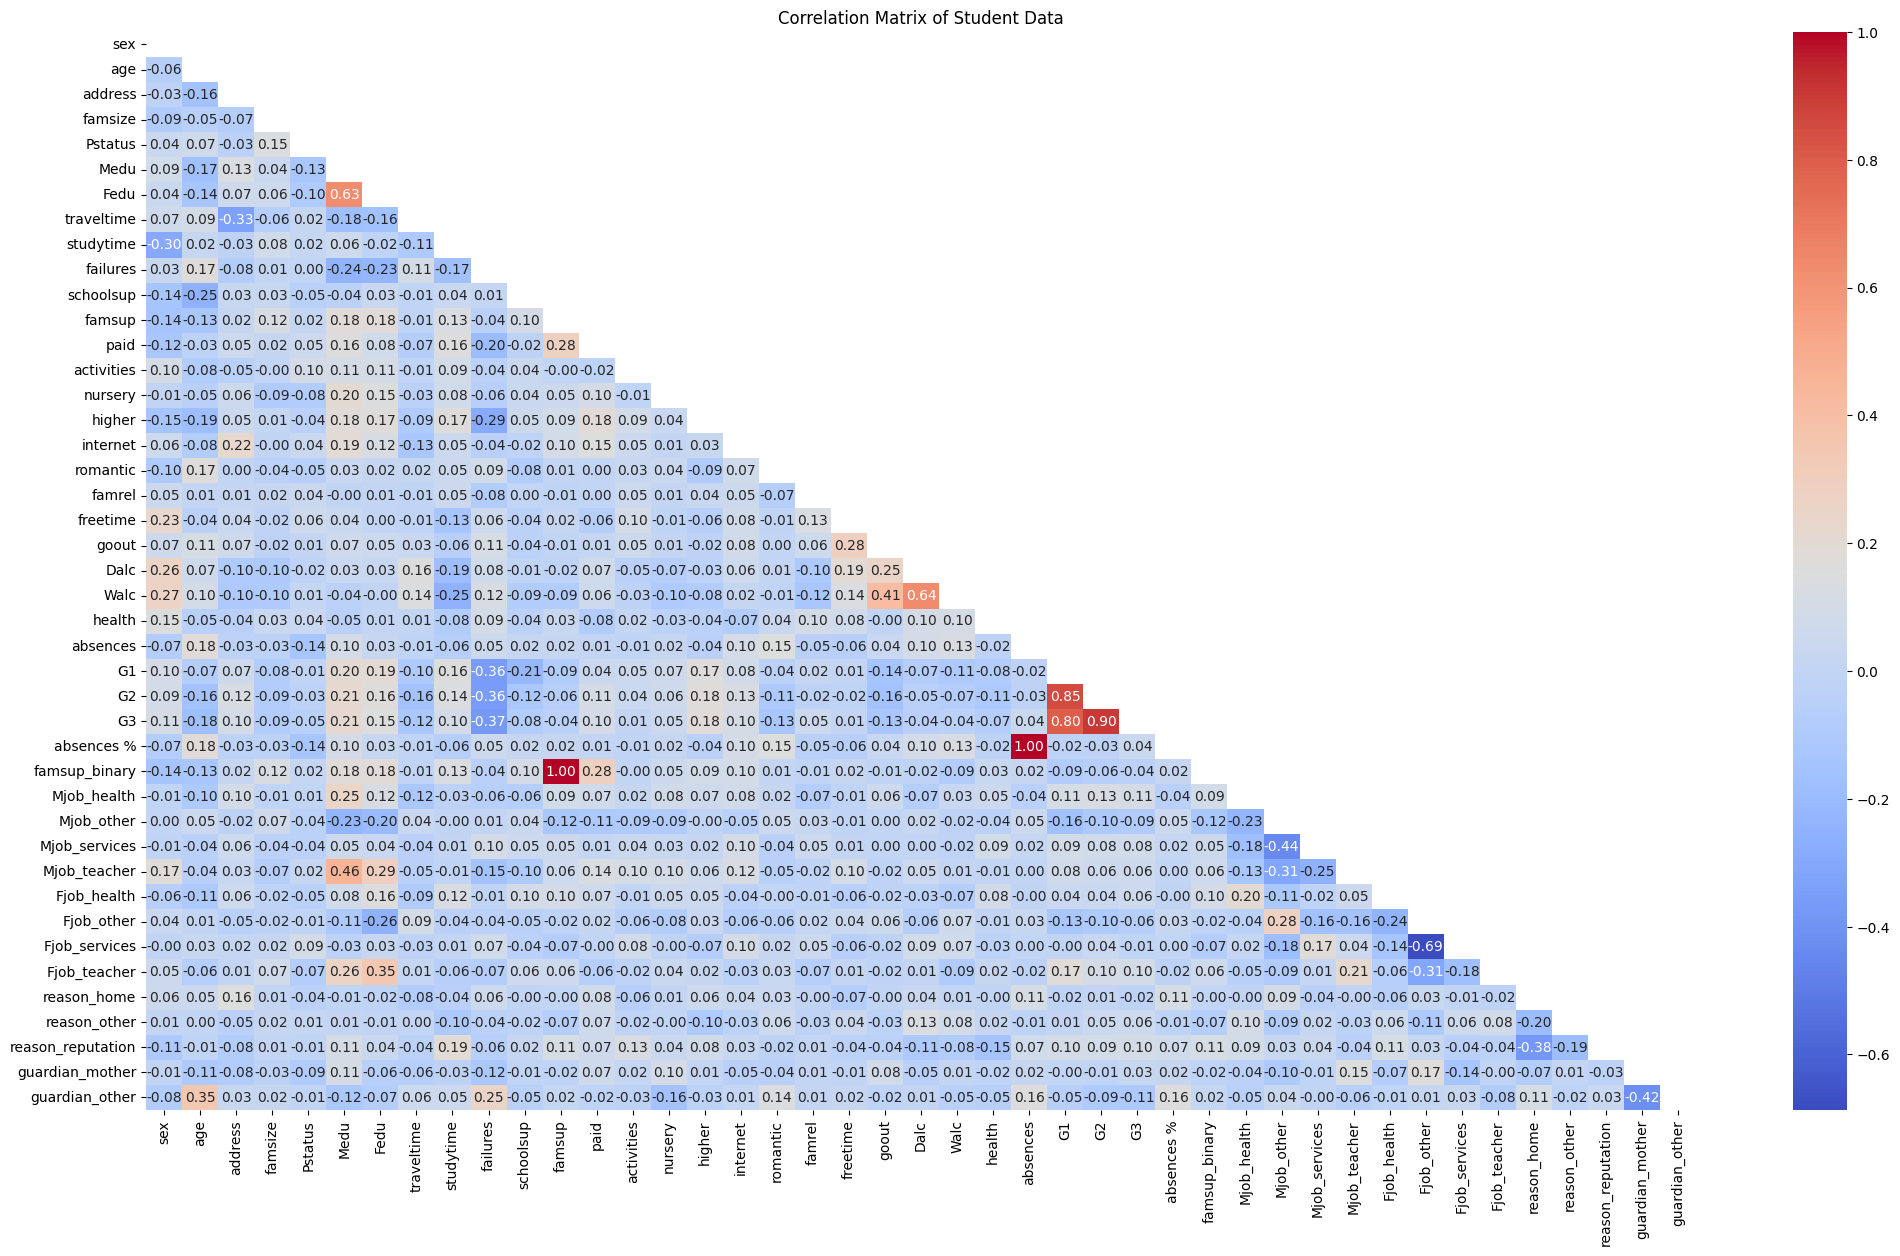

In [130]:

#Plot the Correlation Matrix
plt.figure(figsize=(25, 14))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Student Data')

plt.show()

In [128]:
correlation_matrix.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'absences %', 'famsup_binary', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other'],
      dtype='object')

## Train_test_split()

In [131]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['G1','G2','G3'], axis=1) #dropping target variables (Semesters 1-3 grades)

y = df_encoded[['G1','G2','G3']] #my target variables 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)